## CS611 Assignment 3

#### Chapter 6: Model Specification

Celeste Manughian-Peter

April 16, 2021

____________________________________________________

#### Problem 4. Exercise 6.21 on page 143.

Simulate an MA(1) time series with $n=60$ and with $\theta = 0.5$

In [2]:
library(TSA)

In [29]:
?arima.sim

In [5]:
set.seed(12345)
ts = arima.sim(n=60, list(ma=-0.5))

<b>(a)</b> Calculate the theoretical autocor at lag 1 for this model

$\rho_1 = \frac{-\theta}{1+\theta^2} = \frac{0.5}{1.15} = -0.4 $

(See 4.2.2 on page 57 for MA(1) model summary)

<b>(b)</b> Calculate the sample autocor at lag 1 and compare the value with its theoretical value. Use exhibit 6.2 on page 112 to quantify the comparisons. 


Autocorrelations of series ‘ts’, by lag

     1 
-0.406 

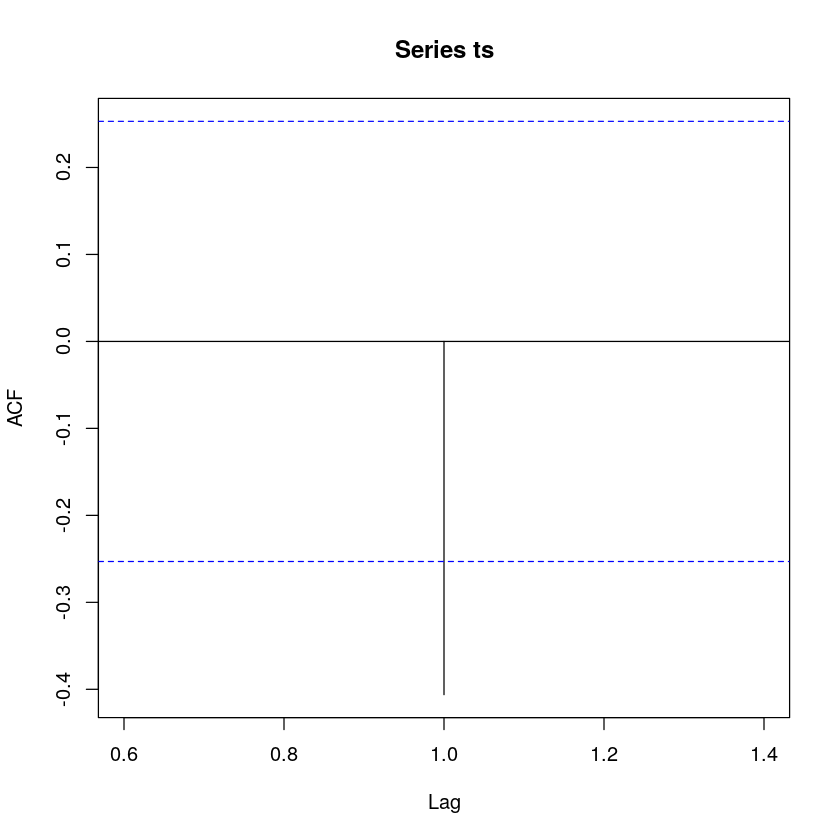

In [7]:
acf(ts,lag.max=1)[1] # r1

In [109]:
.79/sqrt(60)

[1] 0.1019886

The value of the sample autocorrelation of this timeseries at lage 1 is -0.406, which is super close to the theoretical value of -0.4. 

Quantifying comparisons using exhibit 6.2:

The standard error of r1 is .79/sqrt(60) = .10

The estimate of -.406 is within 2 standard deviations of -.400

<b>(c)</b> Repeat part b with a new simulation. Decsribe how the precision of the estimate varies with the different samples selected under identical conditions.


Autocorrelations of series ‘ts’, by lag

     1 
-0.442 

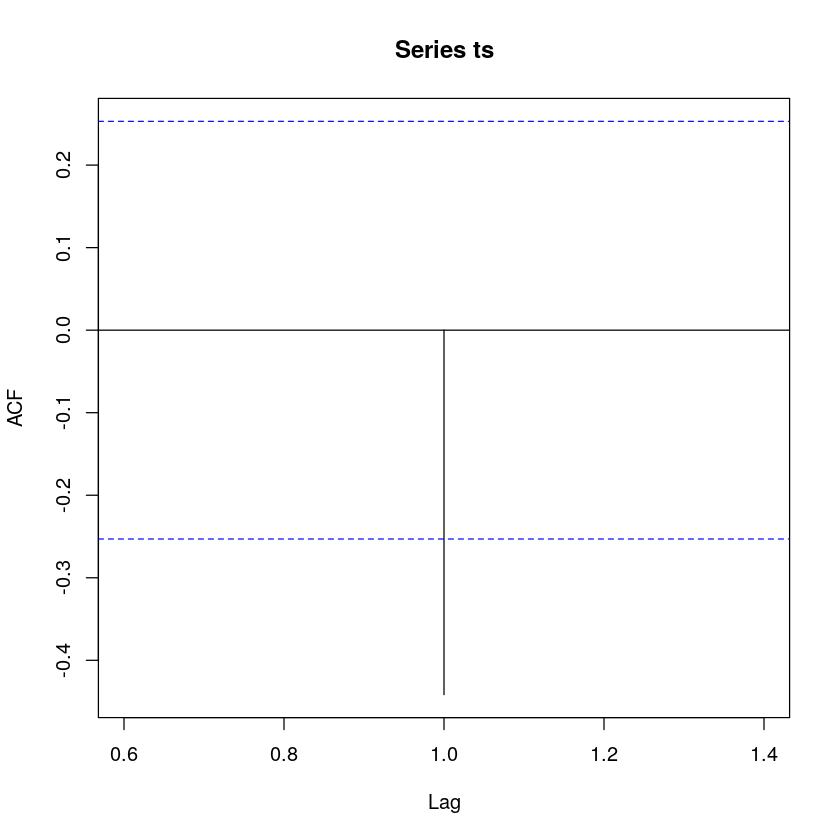

In [107]:
set.seed(12346)
ts = arima.sim(n=60, list(ma=-0.5))

acf(ts,lag.max=1)[1] # r1

The sample autocorrelation output here, $r_1$ is not as precise as the first simulation, but still within a reasonable range of the theoretical value. 

Here the sample autocorrelation is also within 2 std dev of the true value of -.400

<b>(d)</b> If software permits, repeat the simulation of the series and calculation of $r_1$. Decsribe how precision of the estimate varies with different samples selected under identical conditions. How well does the large sample variance given in exhibit 6.2 on page 112 approximate the variance in your sampling distribution?

In [9]:
library(ggplot2)

[1] -0.3945278

[1] 0.09646261

[1] -0.4014731

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



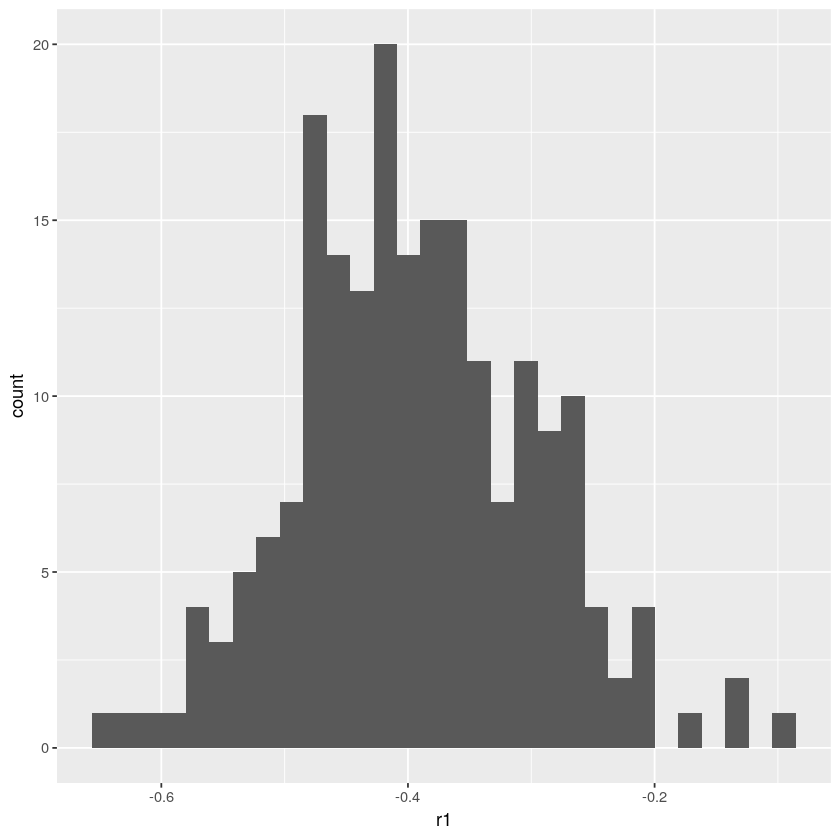

In [27]:
set.seed(12347)

number_ts = 200
r1=rep(NA, number_ts) # Fill this list 
for(i in 1:number_ts) {
    ts = arima.sim(n=60, list(ma=-0.5))
    r1[i] = acf(ts,lag.max=1, plot=F)$acf[1]
}

r1df = data.frame(r1=r1)

mean(r1) 
sd(r1)
median(r1)

ggplot(r1df, aes(x=r1)) + geom_histogram()


    
For MA(1) our theoretical autocorrelation value at lag 1, $\rho_1$, was equal to -0.4. We see in the distribution that the mean generated with 200 simulated realizations of this time series is -.394 with a standard deviation of about .096. Looking at page 112, we see that the large-sample for $\theta = 0.5$ is 

$\frac{.79}{\sqrt{60}}$

In [30]:
.79/sqrt(60)

[1] 0.1019886

The variance in this table, .102, is very close to our estimate at .096, so I'd say the large-sample variance given in exhibit 6.2 on page 112 approximates the variance in our sampling distribution quite well. 

____________________________________________

#### Problem 5. Exercise 6.22 on page 143.

Simulate AR(1) time series with $n=48$ with

<b>(a)</b> $\phi = 0.9$ and calculate the theoretical autocorrelations at lag 1 and lag 5

In [34]:
?acf

In [95]:
set.seed(12348)
n = 48
phi = 0.9
ts = arima.sim(n=n,list(ar=phi))
autocor = acf(ts,lag.max=5, plot=F)
sample_autcor_lag_1 = autocor$acf[1]
sample_autcor_lag_5 = autocor$acf[5]
print("Sample autocor for lag 1 and 5 (part d)")
print(sample_autcor_lag_1)
print(sample_autcor_lag_5)

[1] "Sample autocor for lag 1 and 5 (part d)"
[1] 0.8141659
[1] 0.004679479


Theoretical autcor at lag 1 and 5 for AR(1):

From 4.3.6 we see

$\rho_k = \phi^k$

So for k = 1

$\rho_1 = \phi = 0.9$

and for lag k = 5

$\rho_5 = \phi^5 = (0.9)^5 = 0.59049$

(See book page 67 eqn 4.3.6)

* theoretical vs sample acf values for lags dont look the same here but after generating several realizations of this process, I noticed the fifth lag autcor is highly variable and this is why the sample autocor at lag 5 is not close to the theoretical here  

In [40]:
(0.9)^5

[1] 0.59049

<b>(b)</b> $\phi = 0.6$ and calculate the theoretical autocorrelations at lag 1 and lag 5

In [38]:
set.seed(12348)
n = 48
phi = 0.6
ts = arima.sim(n=n,list(ar=phi))
autocor = acf(ts,lag.max=5, plot=F)
sample_autcor_lag_1 = autocor$acf[1]
sample_autcor_lag_5 = autocor$acf[5]
print("Sample autocor for lag 1 and 5 (part d)")
print(sample_autcor_lag_1)
print(sample_autcor_lag_5)

[1] "Sample autocor for lag 1 and 5 (part d)"
[1] 0.6072127
[1] -0.01328617


Theoretical autcor at lag 1 and 5 for AR(1):

From 4.3.6 we see

$\rho_k = \phi^k$

So for k = 1

$\rho_1 = \phi = 0.6$

and for lag k = 5

$\rho_5 = \phi^5 = (0.6)^5 = 0.07776$

In [41]:
.6^5

[1] 0.07776

<b>(c)</b> $\phi = 0.3$ and calculate the theoretical autocorrelations at lag 1 and lag 5

In [37]:
set.seed(12348)
n = 48
phi = 0.3
ts = arima.sim(n=n,list(ar=phi))
autocor = acf(ts,lag.max=5, plot=F)
sample_autcor_lag_1 = autocor$acf[1]
sample_autcor_lag_5 = autocor$acf[5]
print("Sample autocor for lag 1 and 5 (part d)")
print(sample_autcor_lag_1)
print(sample_autcor_lag_5)

[1] "Sample autocor for lag 1 and 5 (part d)"
[1] 0.3640206
[1] -0.2356986


Theoretical autcor at lag 1 and 5 for AR(1):

From 4.3.6 we see

$\rho_k = \phi^k$

So for k = 1

$\rho_1 = \phi = 0.3$

and for lag k = 5

$\rho_5 = \phi^5 = (0.3)^5 = 0.00243$

In [43]:
.3^5

[1] 0.00243

<b>(d)</b> For each of the series in parts a b and c calculate the sample autocorrelations at lag 1 and lag 5 and compare the values with their theoretical autocor values. Use eqns 6.1.5 and 6.1.6 on page 111 to quantify the comparisons. In general, decsribe how the precision of the estimate varies ith the value of $\phi$.

<font color="red"> see book table for comparisons

The sample and theoretical ACF values are listed above. 

Equation 6.1.5 states:

$Var(r_1) = \frac{1-\phi^2}{n}$

Which we'll use for lag k=1.

Equation 6.1.6 states:

$Var(r_1) = \frac{1}{n} \frac{1+\phi^2}{1-\phi^2}$

for large k, which well use for lag k=5. 


<b>For (a) $\phi = 0.9$</b>

So we get 

$Var(r_1) = \frac{1-\phi^2}{48} = \frac{1-(.9)^2}{48} = 0.0039 $

and

$Var(r_5) = \frac{1}{48} \frac{1+(.9)^2}{1-(.9)^2} = 0.198$


<b>For (b) $\phi = 0.6$</b>

So we get 

$Var(r_1) = \frac{1-\phi^2}{48} = \frac{1-(.6)^2}{48} = 0.01334 $

and

$Var(r_5) = \frac{1}{48} \frac{1+(.6)^2}{1-(.6)^2} = 0.0442$


<b>For (c) $\phi = 0.3$</b>

So we get 

$Var(r_1) = \frac{1-\phi^2}{48} = \frac{1-(.3)^2}{48} = 0.0189 $

and

$Var(r_5) = \frac{1}{48} \frac{1+(.3)^2}{1-(.3)^2} = 0.02495$


In [106]:
n=48
phi=.9
(1-phi^2)/n
(1/n)*((1+(phi)^2)/(1-(phi)^2))

n=48
phi=.6
(1-phi^2)/n
(1/n)*((1+(phi)^2)/(1-(phi)^2))

n=48
phi=.3
(1-phi^2)/n
(1/n)*((1+(phi)^2)/(1-(phi)^2))

[1] 0.003958333

[1] 0.1984649

[1] 0.01333333

[1] 0.04427083

[1] 0.01895833

[1] 0.02495421

We see the sample autocorrelations at lag 1 and 5 for the three AR processes with different $\phi$s above. 

The respective values for theoretical acf for lag 1 and 5 for each process are below: ($\phi$ = 0.9, .6, .3, lag k=1, 5)

.9

.59

.6

.07776

.3

.002

* doublecheck theoretical and sample values, they should be the same

They look very different for all three processes. 

#### Problem 6. Exercise 6.30 on page 145.

Simulate a mixed ARMA(1,1) model of length n = 100 with φ = 0.8 and θ = 0.4.

In [72]:
set.seed(123458)
n=100
theta=0.4
phi=0.8
ts = arima.sim(n=n,list(ar=phi,ma=-theta))

<b>(a)</b> Calculate and plot the theoretical autocorrelation function for this model. Plot sufficient lags until the correlations are negligible.

From equaiton 4.4.5 on page 78, we see:

$\rho_k = \frac{(1-\theta\phi)(\phi-\theta)}{1-2\theta\phi + \theta^2} \phi^{k-1}$

for $k > 0$

Plugging in our values for phi and theta:

$\rho_k = \frac{(1-0.8*0.4)(0.8-0.4)}{1-2*0.4*0.8 + 0.4^2} 0.8^{k-1}$

$\rho_k = (.68*.4)/((1-2*0.4*0.8)+ (0.4^2)) * 0.8^k-1)$

$\rho_k = (0.523076923076923) * 0.8^{k-1})$

In [49]:
(.68*.4)/((1-2*0.4*0.8)+ (0.4^2))

[1] 0.5230769

In [65]:
# Manually 
theoretical_acf <- function(k) {
   #for(i in 1:a) {}
    return((0.523076923076923) * 0.8^(k-1))
}

number_ks = 30
rho_k = rep(NA, number_ks) # Fill this list 
ks = rep(NA, number_ks)
for(k in 1:number_ks) {
    rho_k[k] = theoretical_acf(k)
    ks[k] = k
}

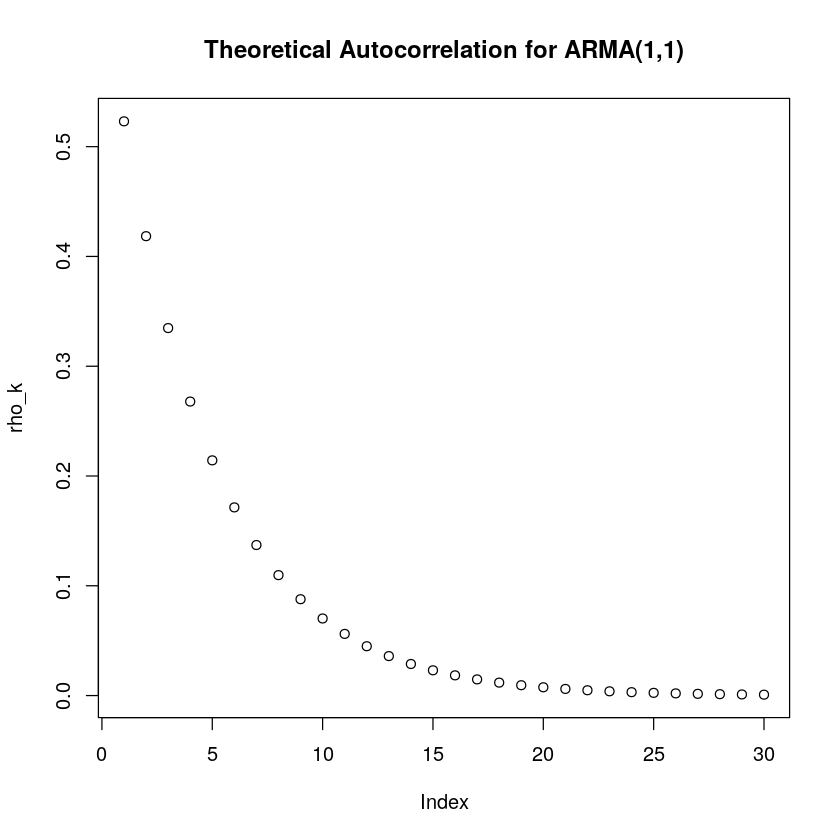

In [66]:
plot(rho_k, main="Theoretical Autocorrelation for ARMA(1,1)")

In [70]:
?ARMAacf # Compute Theoretical ACF for an ARMA Process

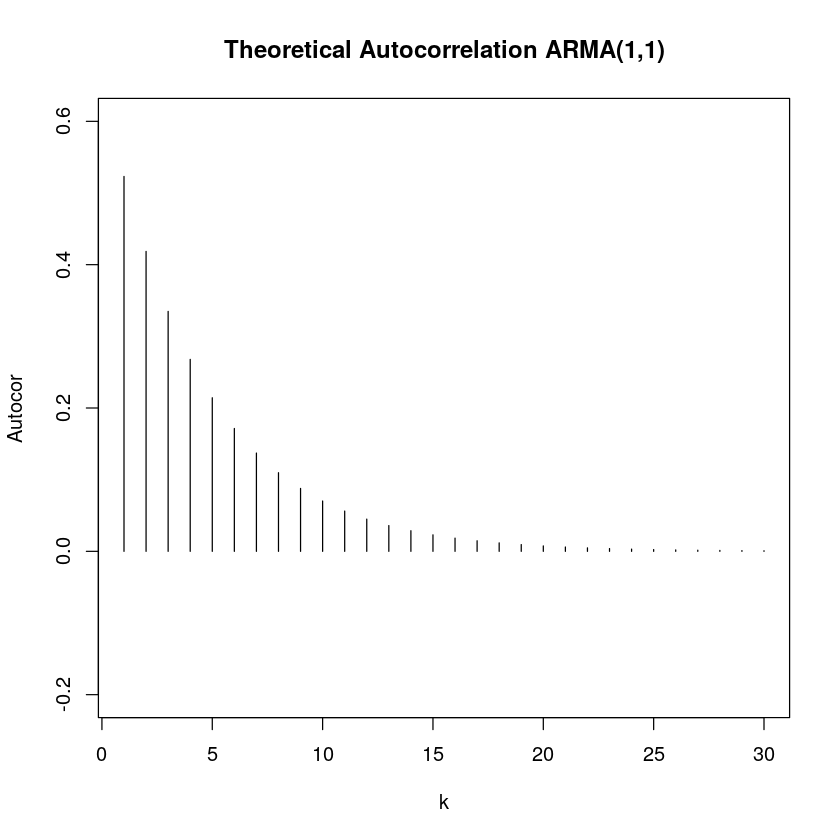

In [69]:
# Automatically get function values 
ACF=ARMAacf(ar=phi,ma=-theta,lag.max=number_ks)
plot(y=ACF[-1], 
     x=1:number_ks, 
     xlab='k', 
     main="Theoretical Autocorrelation ARMA(1,1)", 
     ylab='Autocor',
     type='h',
     ylim=c(-.2,.6))

<b>(b)</b> Calculate and plot the sample ACF for your simulated series. How well do the values and patterns match the theoretical ACF from part (a)?

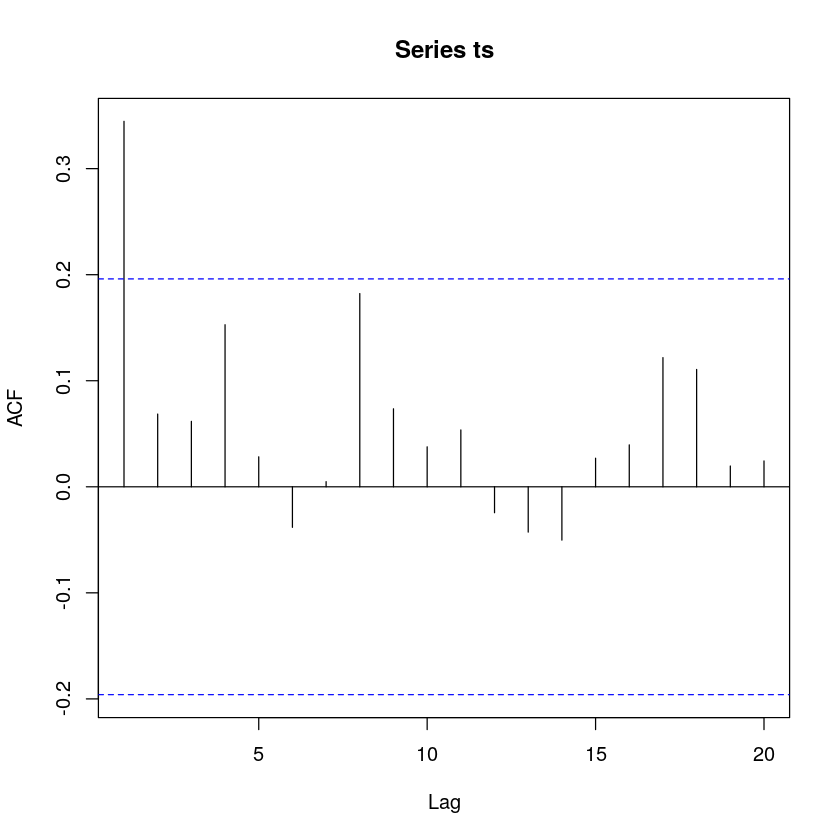

In [73]:
acf(ts)

How well do the sample ACF values for the simulated series match the theoretical acf from part a? It doesnt look the same to me. They have similar declining autocorrelation values for the first 5 lags but after that the sample autocorrelation function starts to wave. 

<b>(c)</b> Calculate and interpret the sample EACF for this series. Does the EACF help you specify the correct orders for the model?

In [80]:
data(arma11.s)
eacf(arma11.s)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x x x o o o o o o o  o  o  o 
1 x o o o o o o o o o o  o  o  o 
2 x o o o o o o o o o o  o  o  o 
3 x x o o o o o o o o o  o  o  o 
4 x o x o o o o o o o o  o  o  o 
5 x o o o o o o o o o o  o  o  o 
6 x o o o x o o o o o o  o  o  o 
7 x o o o x o o o o o o  o  o  o 


In [86]:
eacf(ts)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x o o o o o o o o o o  o  o  o 
1 o o o o o o o o o o o  o  o  o 
2 x o o o o o o o o o o  o  o  o 
3 x x x o o o o o o o o  o  o  o 
4 x x o o o o o o o o o  o  o  o 
5 x x o x o o o o o o o  o  o  o 
6 x x o x o o o o o o o  o  o  o 
7 x x o x o o x o o o o  o  o  o 


The theoretical EACF indicates an ARMA(1,1) would be the most parsimonious model, as there is an o in the top left corner under 1,1. 

The sample EACF shows that an ARMA(0,1), ARMA(1,0), or ARMA(1,1) would be a parsimonious model for this data. 

<b>(d)</b> Repeat parts (b) and (c) with a new simulation using the same parameter values and sample size.

In [77]:
set.seed(123459)
n=100
theta=0.4
phi=0.8
ts1 = arima.sim(n=n,list(ar=phi,ma=-theta))

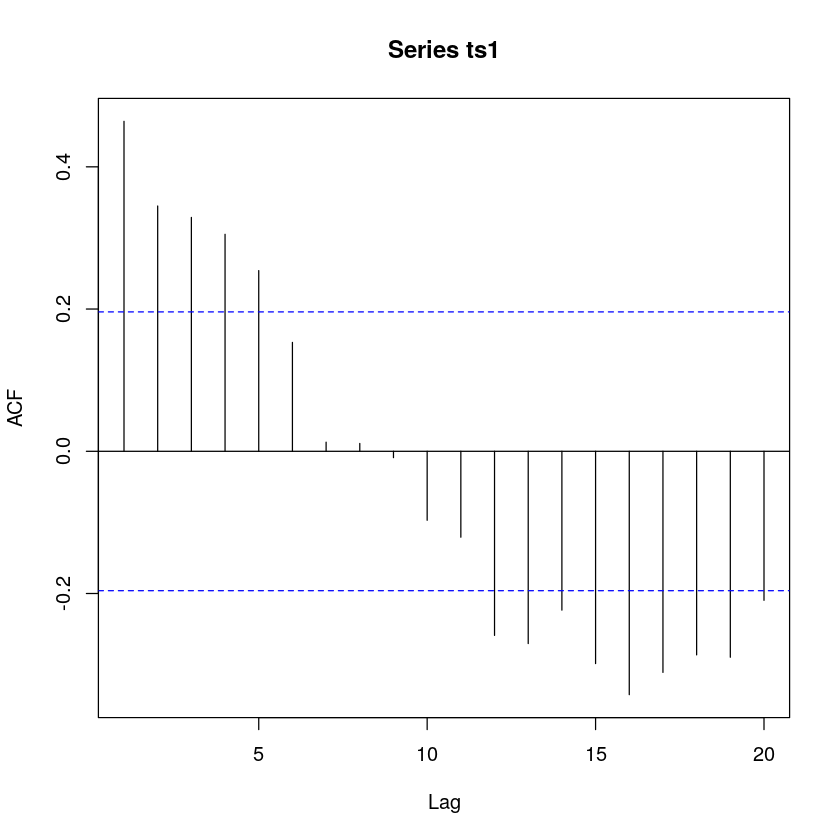

In [81]:
acf(ts1)

The sample ACF values have a similar behavior to the first simulation where the first 6 lags show a similar decreasing beahvior as the theoretical ACF values, but start to flucuate around 0 after that, which the theoretical ACF does not. 

In [87]:
eacf(ts1)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x x x x o o o o o o  x  x  x 
1 x o o o o o o o o o o  o  o  o 
2 x o o o o o o o o o o  o  o  o 
3 x o o o o o o o o o o  o  o  o 
4 x o o o o o o o o o o  o  o  o 
5 x x o o o o o o o o o  o  o  o 
6 x x o o o o o o o o o  o  o  o 
7 o o x o o o o o o o o  o  o  o 


The theoretical EACF indicates an ARMA(1,1) would be the most parsimonious model, as there is an o in the top left corner under 1,1. 

The sample EACF shows that an ARMA(1,1) would be a good fit for this data

<b>(e)</b> Repeat parts (b) and (c) with a new simulation using the same parameter values but sample size n = 48.

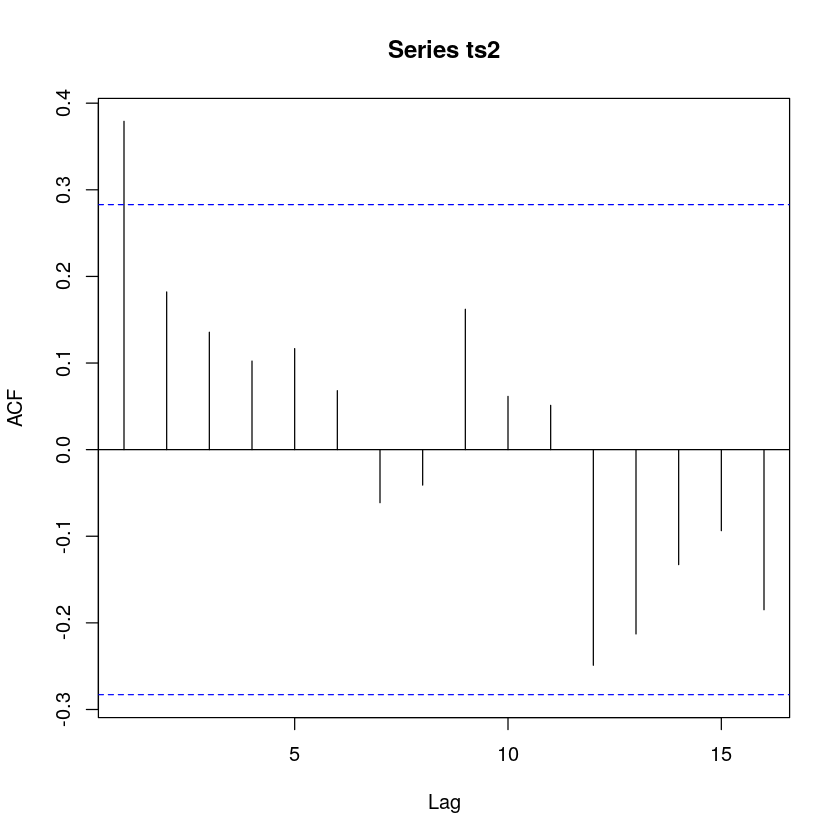

In [82]:
n=48
set.seed(123459)
ts2 = arima.sim(n=n,list(ar=phi,ma=-theta))
acf(ts2)

The sample ACF values have a similar behavior to the first simulation where the first 6 lags show a similar decreasing beahvior as the theoretical ACF values, but start to flucuate around 0 after that, which the theoretical ACF does not. 

In [88]:
eacf(ts2)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x o o o o o o o o o o  o  o  o 
1 o o o o o o o o o o o  o  o  o 
2 x o o o o o o o o o o  o  o  o 
3 x o o o o o o o o o o  o  o  o 
4 x o o o o o o o o o o  o  o  o 
5 o x o o o o o o o o o  o  o  o 
6 o x o o o o o o o o o  o  o  o 
7 o x o o o o o o o o o  o  o  o 


The theoretical EACF indicates an ARMA(1,1) would be the most parsimonious model, as there is an o in the top left corner under 1,1. 

The sample EACF shows that an ARMA(1,1), ARMA(0,1) or ARMA(1,0)  would be a good fit for this data

<b>(f)</b> Repeat parts (b) and (c) with a new simulation using the same parameter values but sample size n = 200.

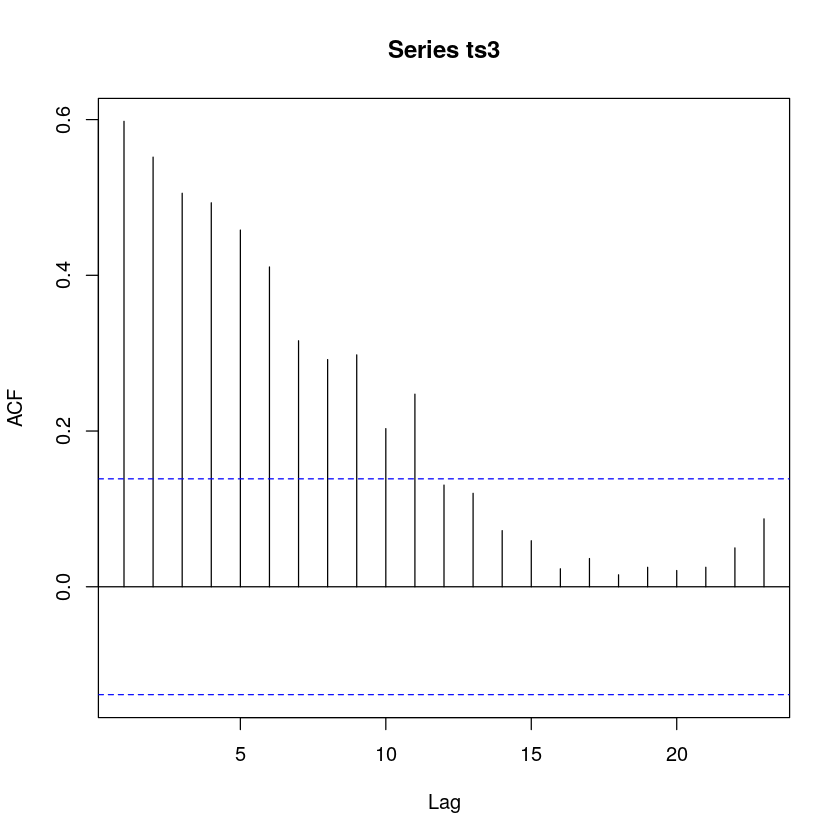

In [83]:
n=200
set.seed(123459)
ts3 = arima.sim(n=n,list(ar=phi,ma=-theta))
acf(ts3)

The sample ACF values at 200 samples start to look a bit more like the theoretical ACF values, slowly decreasing to 0. 

In [89]:
eacf(ts3)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x x x x x x x x x x  o  o  o 
1 x o o o o o o o x x x  o  o  o 
2 x x o o o o o o o o x  o  o  o 
3 x x x o o o o o o o x  o  o  o 
4 x x o x o o o o o o x  o  o  o 
5 x o x x o o o o o o o  o  o  o 
6 x x x x o o o o o o o  o  o  o 
7 x x x x o o o o o o o  o  o  o 


The theoretical EACF indicates an ARMA(1,1) would be the most parsimonious model, as there is an o in the top left corner under 1,1. 

The sample EACF shows that an ARMA(1,1) would be a good fit for this data

____________________________________________________
#### Problem 7. Exercise 6.37 on page 147.

Calculate and interpret the sample EACF for the logarithms of the Los Angeles
rainfall series. The data are in the file named larain . Do the results confirm that the
logs are white noise

In [92]:
data(larain)

In [93]:
d = log(larain)

In [94]:
eacf(d)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 o o o o o o o o o o o  o  o  o 
1 o o o o o o o o o o o  o  o  o 
2 x x o o o o o o o o o  o  o  o 
3 x o o o o o o o o o o  o  o  o 
4 x o o o o o o o o o o  o  o  o 
5 x x x x x o o o o o o  o  o  o 
6 x x o o x o o o o o o  o  o  o 
7 x o x o o o o o o o o  o  o  o 


A white noise process would be classified as an ARMA(0,0) process, since there is no correlation in the AR or MA sense. 

I would say that the EACF indicates that the logs of the LA rainfall data should be classified as ARMA(0,0) thus they could be classified as a white noise process. 